In [ ]:
!pip install beautifultable
import re
from beautifultable import BeautifulTable
import requests
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
response = requests.get("https://www.pastebin.com/raw/ZYRyXREP")
lines = response.text.split("\n")
print(lines)

['As a term, data analytics predominantly refers to an assortment of applications, from basic business\r', 'intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced\r', "analytics. In that sense, it's similar in nature to business analytics, another umbrella term for\r", 'approaches to analyzing data -- with the difference that the latter is oriented to business uses, while\r', "data analytics has a broader focus. The expansive view of the term isn't universal, though: In some\r", 'cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate\r', 'category. Data analytics initiatives can help businesses increase revenues, improve operational\r', 'efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to\r', 'emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of\r', "boosting business performance. Depending on the particular applic

In [ ]:
table = BeautifulTable()
table.columns.header = ["line","Total Word Count", "Distinct Word Count", "Occurance of “data”", "Probability of the word “data” occurring",]
distinct_count = []
for i,line in enumerate(lines):
    lines[i] = line.strip()
    line = lines[i].lower()
    count_all = re.findall("[\w|\d]+",line)
    data_find = re.findall("\Wdata\W",line.lower())
    data_analytics_find = re.findall("\Wdata\Wanalytics\W",line)
    new_list = list(dict.fromkeys(re.findall("[\w|\d]+",line)))
    distinct_count.append(len(new_list))
    table.rows.append([i+1,len(count_all),len(new_list),len(data_find),round(len(data_find)/len(count_all),3)])
print(table)

+------+------------+--------------+--------------+----------------------------+
| line | Total Word | Distinct Wor | Occurance of | Probability of the word “d |
|      |    Count   |   d Count    |    “data”    |       ata” occurring       |
+------+------------+--------------+--------------+----------------------------+
|  1   |     15     |      15      |      1       |           0.067            |
+------+------------+--------------+--------------+----------------------------+
|  2   |     13     |      13      |      0       |            0.0             |
+------+------------+--------------+--------------+----------------------------+
|  3   |     16     |      14      |      0       |            0.0             |
+------+------------+--------------+--------------+----------------------------+
|  4   |     16     |      14      |      1       |           0.062            |
+------+------------+--------------+--------------+----------------------------+
|  5   |     18     |      1

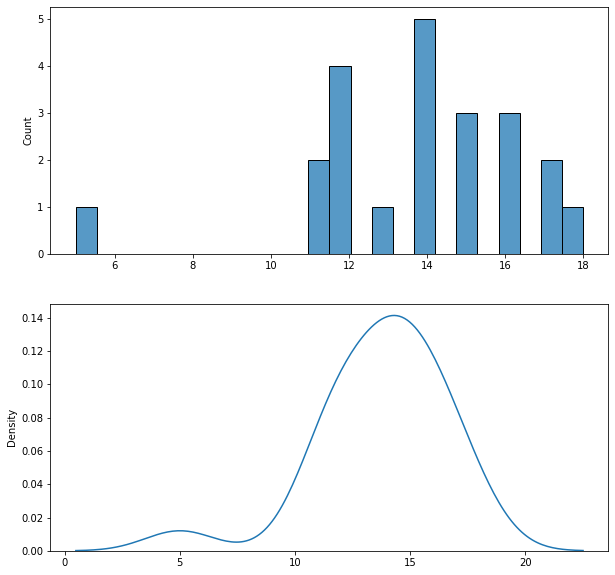

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(10,10))
sns.histplot(distinct_count, bins=24, ax=ax[0])
sns.kdeplot(distinct_count, ax=ax[1])

In [ ]:
text = ' '.join(lines)
print(text)


As a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced analytics. In that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter is oriented to business uses, while data analytics has a broader focus. The expansive view of the term isn't universal, though: In some cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate category. Data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of boosting business performance. Depending on the particular application, the data that's analyzed can consist of 

In [ ]:
data_count = len(re.findall("\Wdata\W",text))
data_analytics_count = len(re.findall("\Wdata\Wanalytics\W",text))
P = data_analytics_count/data_count
print(f"Probability of the word “analytics” occurring after the word “data”, P= data_analytics_count/data_count = {data_analytics_count}/{data_count} = {P}")

Probability of the word “analytics” occurring after the word “data”, P= data_analytics_count/data_count = 4/15 = 0.26666666666666666
